In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('creditcard.csv')

In [89]:
df.shape

(284807, 31)

In [90]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [92]:
x = df.drop(['Time', 'Class'], axis=1)
y = df['Class']

In [93]:
import warnings
warnings.filterwarnings('ignore')

<Axes: xlabel='Class', ylabel='count'>

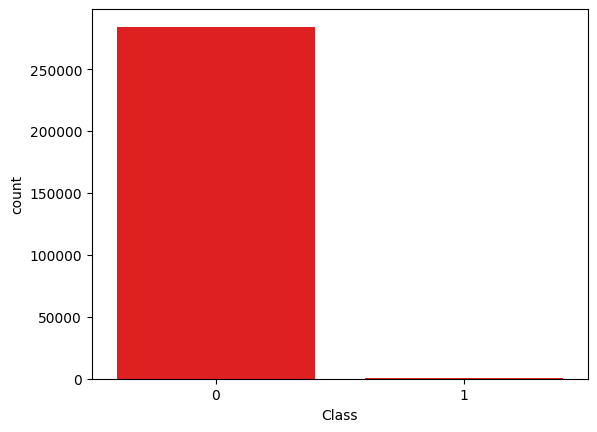

In [94]:
sns.countplot(x = y, color='r')

In [95]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state = 0)

In [96]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [97]:
y_pred = clf.predict(x_test)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9992135052386169

# Random Under Sampling

In [99]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
x_res, y_res = rus.fit_resample(x,y)

In [100]:
y_res.value_counts()

Class
0    492
1    492
Name: count, dtype: int64

# Random Over Sampling

In [101]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_res, y_res = ros.fit_resample(x,y)

In [102]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

# SMOTE

In [103]:
from imblearn.over_sampling import SMOTE
rus = SMOTE(random_state=0)
x_res, y_res = rus.fit_resample(x,y)

In [104]:
y_res.value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.25, random_state = 0)

In [106]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [107]:
y_pred = clf.predict(x_test)

In [108]:
from sklearn.tree import plot_tree

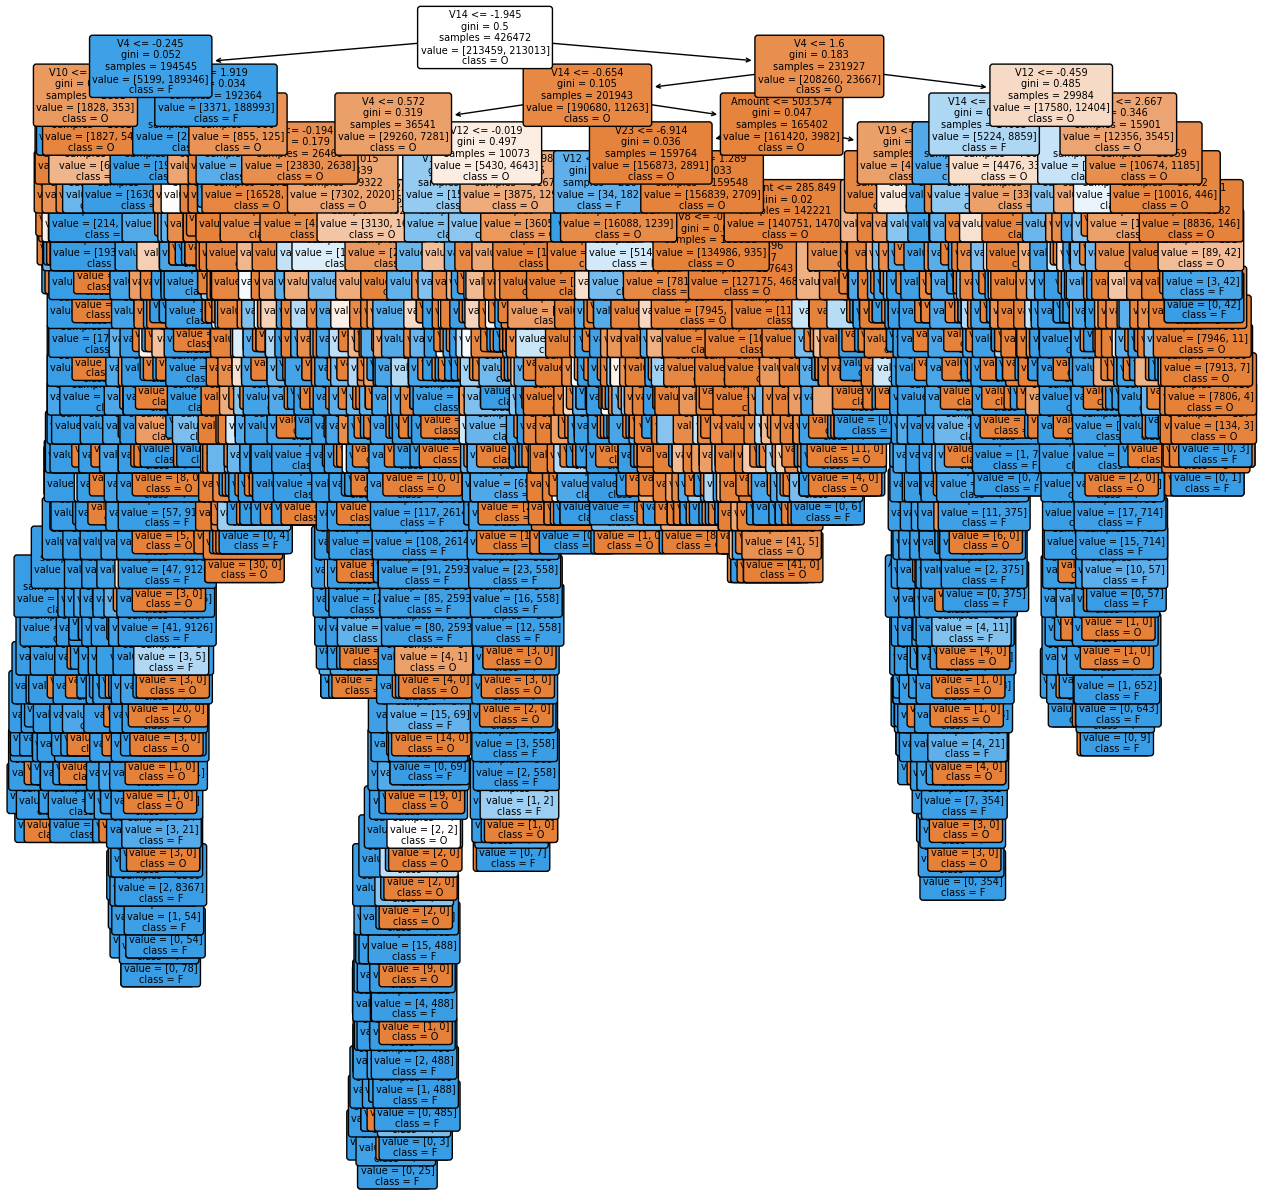

In [109]:
plt.figure(figsize=(15,15))
plot_tree(clf, fontsize=7, rounded= True, filled=True, feature_names=x.columns, class_names= ['O','F']);